In [2]:
import numpy as np #we import the libraries
import cv2, PIL
import cv2
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
from skimage import io
import urllib.request

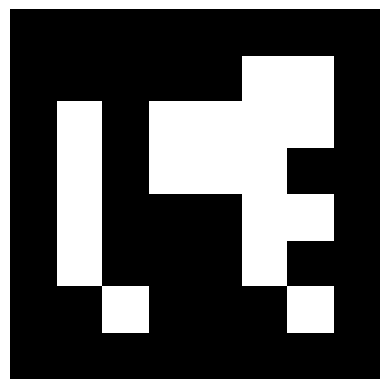

In [3]:
import numpy as np #we import the libraries
import cv2, PIL
import cv2
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
from skimage import io
import urllib.request

aruco_dict =aruco.Dictionary_get(aruco.DICT_6X6_250) #Dictionary/Set of markers, it contains the inner codification.

fig = plt.figure()
nx = 1
ny = 1
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700) #we draw marker
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest") #print marker
    ax.axis("off")
#we save the marker in the folder of our device
plt.savefig("C:/Users/57317/OneDrive/Documentos/Vision/aruco_markers.jpeg")
plt.show()

In [4]:
def calibration(images): #Definition of the function for calibration
  pattern_shape = (9, 6)
  print('=== Camera Calibration ===')
  
  DISPLAY_CORNERS = True
  # Define the world coordinates of the checkerboard corners
  objp = np.zeros((pattern_shape[0] * pattern_shape[1], 3), np.float32)
  objp[:, :2] = np.mgrid[0:pattern_shape[0], 0:pattern_shape[1]].T.reshape(-1, 2)
  # Create a list to store the object points and the image points
  objp_list = [] # 3D points in real world space
  imgp_list = [] # 2D points in image plane
  img_shape = None
  
  # Detect the corners in each image
  for fname in range(len(images)):
    print(fname)
    img = images[fname]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if img_shape is None:
        img_shape = gray.shape
    elif img_shape != gray.shape:
        print('Mismatch size')
        continue
    # Find the checkerboard corners
    ret, corners = cv2.findChessboardCorners(gray, pattern_shape, None) # Find the chess board corners

    # If the corners are found
    if ret:
        objp_list.append(objp)
        imgp_list.append(corners)

        if DISPLAY_CORNERS:
            cv2.drawChessboardCorners(img, pattern_shape, corners, ret) #function is then used to draw the corners on the original image
            plt.imshow(img)
            plt.show()

            cv2.waitKey(0) #the program waits for 0 milliseconds
    else:
        print('Could not find corners in image', fname)

  CALIBFLAG = 0  # cv2.CALIB_FIX_K3
  print(' ', len(objp_list), 'images are used')
  rms, cam_int, cam_dist, rvecs, tvecs = cv2.calibrateCamera(objp_list, imgp_list, img_shape, None, None, None, None, CALIBFLAG)
  np.set_printoptions(suppress=True)
  return cam_int,cam_dist
  
  

=== Camera Calibration ===
0
Could not find corners in image 0
1


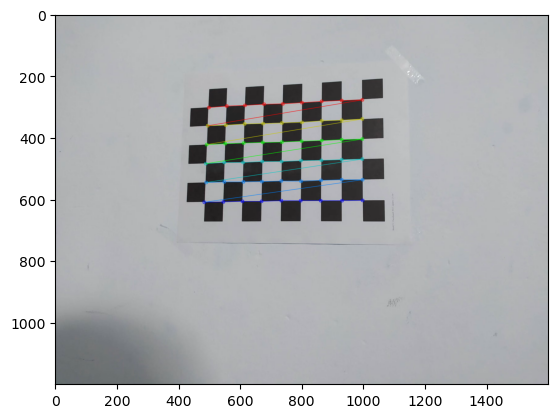

2


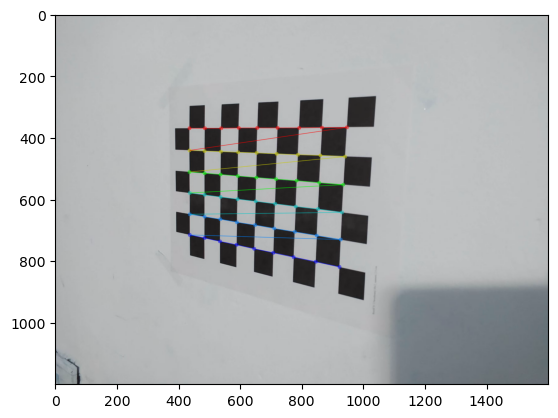

3


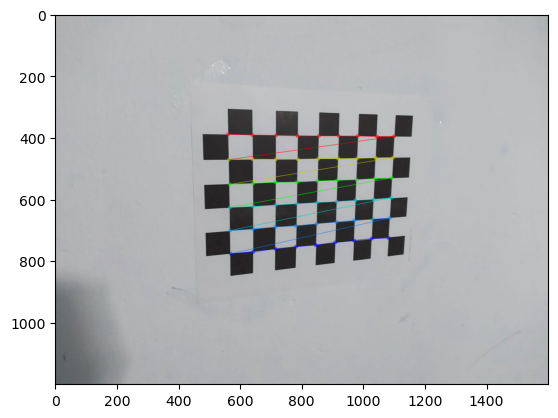

4


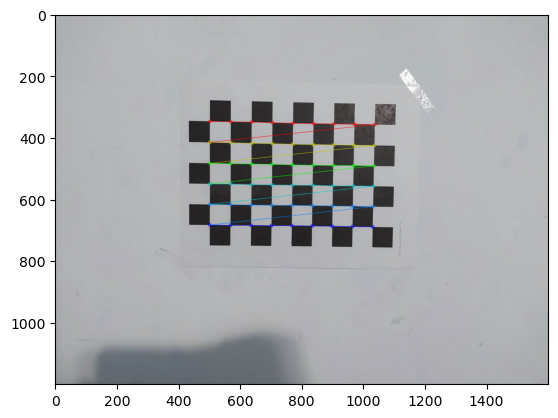

5


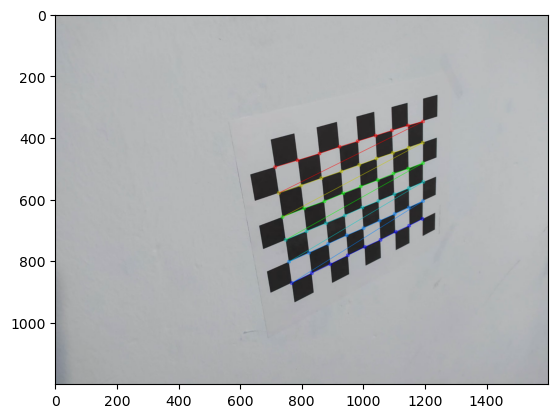

6


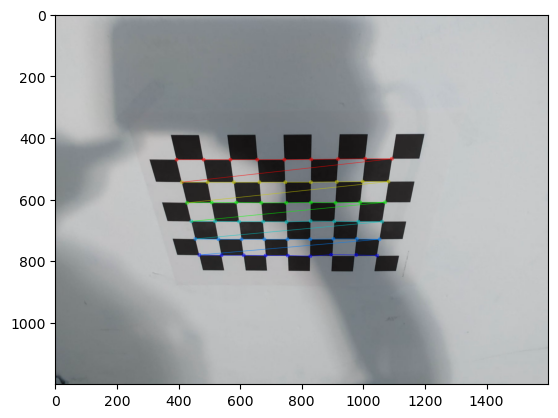

7
Could not find corners in image 7
8
Could not find corners in image 8
9


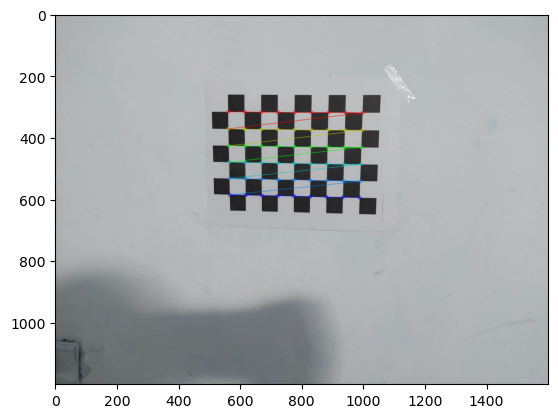

  7 images are used
[[1221.55974445    0.          783.86430096]
 [   0.         1222.10977754  595.59726311]
 [   0.            0.            1.        ]]
[[ 0.23143999 -2.49382049 -0.00464086 -0.00567373  8.01389779]]


In [5]:
#we load the images to calibrate the camera
a= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/a.jpeg')

b= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/b.jpeg')

c= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/c.jpeg')

d= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/d.jpeg')

e= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/e.jpeg')

f= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/f.jpeg')

g= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/g.jpeg')

h= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/h.jpeg')

i= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/i.jpeg')

j= cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/Nueva carpeta (5)/j.jpeg')

images = [a,b,c,d,e,f,g,h,i,j]

#we obtain the values of the matrix and distortions
matrix, dist=calibration(images)
print(matrix)
print(dist)

0


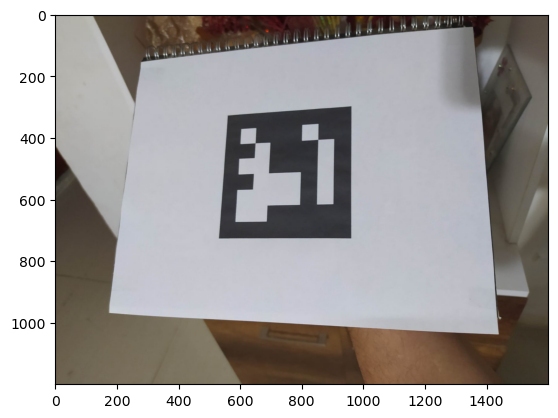

1


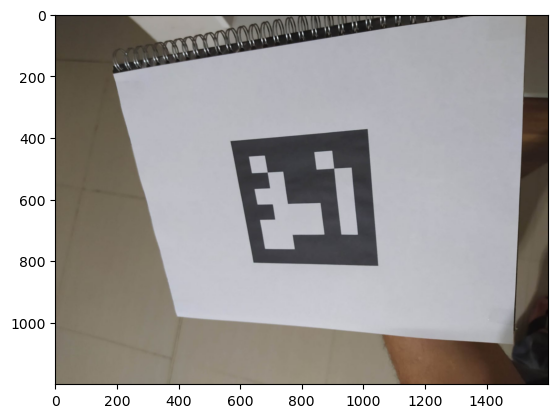

2


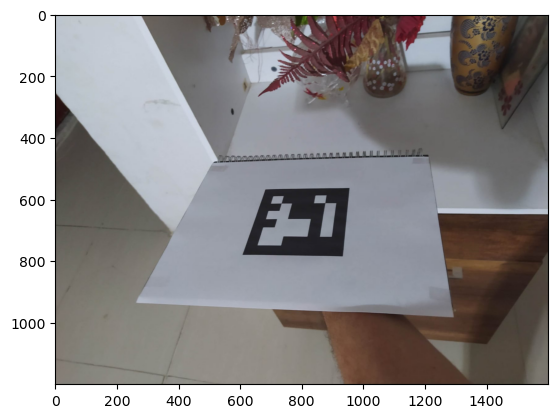

3


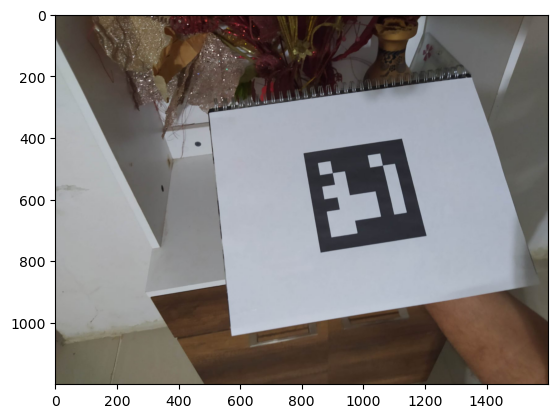

In [6]:
#We read the photos of the markers made in real life
img1 = cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/1.jpeg')
img2 = cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/2.jpeg')
img3 = cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/3.jpeg')
img4 = cv2.imread('C:/Users/57317/OneDrive/Documentos/Vision/4.jpeg')
frame = [img1,img2,img3,img4]

#We print these images
for i in range(len(frame)):
    print(i)
    img = frame[i]
    color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(color)
    plt.show()

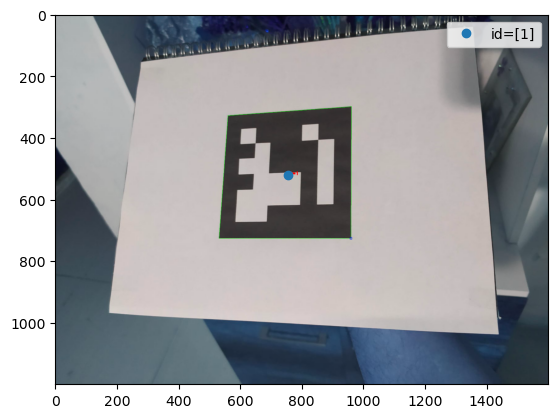

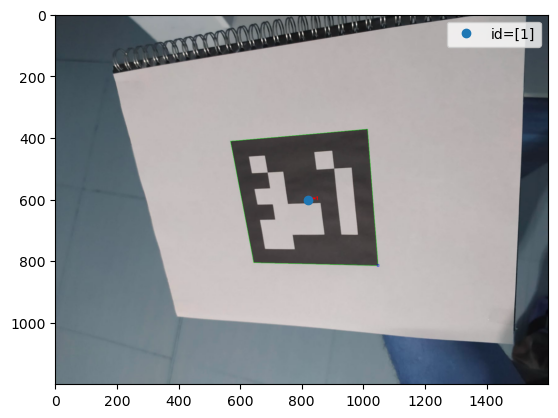

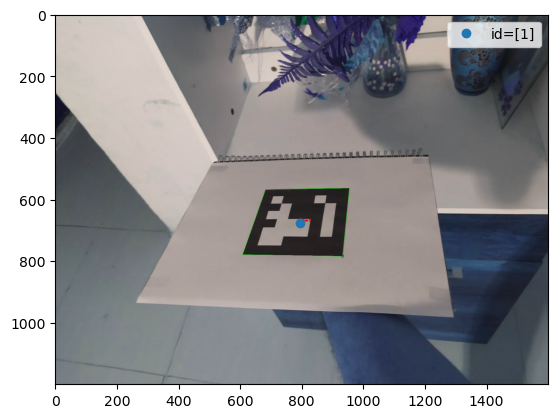

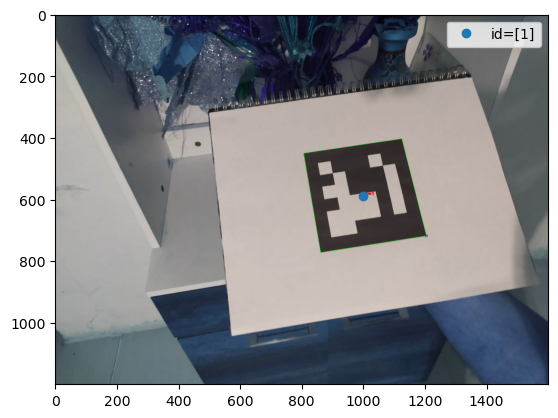

CPU times: total: 2.36 s
Wall time: 2.28 s


In [7]:
%%time
for i in range(len(frame)):
    gray = cv2.cvtColor(frame[i], cv2.COLOR_BGR2GRAY) #convert images to grayscale
    aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250) #Arauco dictionary
    parameters =  aruco.DetectorParameters_create() #arauco parameter detection
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters) #Marker detection
    frame_markers = aruco.drawDetectedMarkers(frame[i].copy(), corners, ids)#we draw on the marker
    plt.figure()
    plt.imshow(frame_markers)
    for i in range(len(ids)):
        c = corners[i][0] #we use the corners of the marker
        plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i])) #we graphed on this
    plt.legend()
    plt.show()

In [8]:
frame=img3
marker_id = 0
marker_size = 700

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #convert images to grayscale
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250) #Arauco dictionary
parameters =  aruco.DetectorParameters_create() #arauco parameter detection
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)#Marker detection
frame_markers=cv2.aruco.drawDetectedMarkers(frame, corners) #we draw on the marker

#definition corners
c1=(corners[0][0][0][0],corners[0][0][0][1])
c2=(corners[0][0][1][0],corners[0][0][1][1])
c3=(corners[0][0][2][0],corners[0][0][2][1])
c4=(corners[0][0][3][0],corners[0][0][3][1])

#definition vertices
v1,v2=c1[0],c1[1]
v3,v4=c2[0],c2[1]
v5,v6=c3[0],c3[1]
v7,v8=c4[0],c4[1]

#Cube top face
cv2.line(frame,(int(v1),int(v2-200)),(int(v3),int(v4-200)),(255,255,0),3)
cv2.line(frame,(int(v5),int(v6-200)),(int(v7),int(v8-200)),(255,255,0),3)
cv2.line(frame,(int(v1),int(v2-200)),(int(v7),int(v8-200)),(255,255,0),3)
cv2.line(frame,(int(v3),int(v4-200)),(int(v5),int(v6-200)),(255,255,0),3)

#Bottom face of the cube
cv2.line(frame,(int(v1),int(v2)),(int(v3),int(v4)),(155,155,0),3)
cv2.line(frame,(int(v5),int(v6)),(int(v7),int(v8)),(155,155,0),3)
cv2.line(frame,(int(v1),int(v2)),(int(v7),int(v8)),(155,155,0),3)
cv2.line(frame,(int(v3),int(v4)),(int(v5),int(v6)),(155,155,0),3)

#Side faces of the cube
cv2.line(frame,(int(v1),int(v2-200)),(int(v1),int(v2)),(155,255,0),3)
cv2.line(frame,(int(v3),int(v4-200)),(int(v3),int(v4)),(155,255,0),3)
cv2.line(frame,(int(v5),int(v6-200)),(int(v5),int(v6)),(155,255,0),3)
cv2.line(frame,(int(v7),int(v8-200)),(int(v7),int(v8)),(155,255,0),3)

#we draw the 3d cube
cv2.imshow("Dibujo cubo 3D",frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cap=cv2.VideoCapture(0)
cap.set(3,1280)
cap.set(4,720)

aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250) #Arauco dictionary
parameters =  aruco.DetectorParameters_create() #arauco parameter detection

while True:
    ret, frame=cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #convert images to grayscale
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)#Marker detection

    try:
        if np.all(ids!=None):
            c1=(corners[0][0][0][0],corners[0][0][0][1])
            c2=(corners[0][0][1][0],corners[0][0][1][1])
            c3=(corners[0][0][2][0],corners[0][0][2][1])
            c4=(corners[0][0][3][0],corners[0][0][3][1])

            #definition vertices
            v1,v2=c1[0],c1[1]
            v3,v4=c2[0],c2[1]
            v5,v6=c3[0],c3[1]
            v7,v8=c4[0],c4[1]

            #Cube top face
            cv2.line(frame,(int(v1),int(v2-200)),(int(v3),int(v4-200)),(255,255,0),3)
            cv2.line(frame,(int(v5),int(v6-200)),(int(v7),int(v8-200)),(255,255,0),3)
            cv2.line(frame,(int(v1),int(v2-200)),(int(v7),int(v8-200)),(255,255,0),3)
            cv2.line(frame,(int(v3),int(v4-200)),(int(v5),int(v6-200)),(255,255,0),3)

            #Bottom face of the cube
            cv2.line(frame,(int(v1),int(v2)),(int(v3),int(v4)),(155,155,0),3)
            cv2.line(frame,(int(v5),int(v6)),(int(v7),int(v8)),(155,155,0),3)
            cv2.line(frame,(int(v1),int(v2)),(int(v7),int(v8)),(155,155,0),3)
            cv2.line(frame,(int(v3),int(v4)),(int(v5),int(v6)),(155,155,0),3)

            #Side faces of the cube
            cv2.line(frame,(int(v1),int(v2-200)),(int(v1),int(v2)),(155,255,0),3)
            cv2.line(frame,(int(v3),int(v4-200)),(int(v3),int(v4)),(155,255,0),3)
            cv2.line(frame,(int(v5),int(v6-200)),(int(v5),int(v6)),(155,255,0),3)
            cv2.line(frame,(int(v7),int(v8-200)),(int(v7),int(v8)),(155,255,0),3)
            
    except:
        if ids is None or len(ids) == 0:
            print(" Fallo la detection")

    cv2.imshow("Dibujo cubo 3D",frame)
    
    if (cv2.waitKey(1) == ord('s')):
        a=frame
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'capture' is not defined